<a href="https://colab.research.google.com/github/rdchkulasinghe/NLP/blob/main/Day_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [10]:
import nltk
from nltk import pos_tag, word_tokenize
from nltk.corpus import stopwords
import matplotlib.pyplot as plt
import seaborn as sns

#Download NLTK resources

nltk.download('punkt') # Ensure punkt is downloaded
nltk.download('averaged_perceptron_tagger')
nltk.download("averaged_perceptron_tagger_eng") # Download the specific English tagger
nltk.download('punkt_tab') # Download the punkt_tab resource

text= "I love Python programming and I enjoy coding in Python"

tokens = word_tokenize(text)

tags= pos_tag(tokens)
print(tags)

#Extract only tags

pos_counts={}
for word, tag in tags:
    if tag in pos_counts:
        pos_counts[tag] += 1
    else:
       pos_counts[tag] = 1

pos_counts

[('I', 'PRP'), ('love', 'VBP'), ('Python', 'NNP'), ('programming', 'NN'), ('and', 'CC'), ('I', 'PRP'), ('enjoy', 'VBP'), ('coding', 'VBG'), ('in', 'IN'), ('Python', 'NNP')]


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package averaged_perceptron_tagger_eng to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger_eng is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


{'PRP': 2, 'VBP': 2, 'NNP': 2, 'NN': 1, 'CC': 1, 'VBG': 1, 'IN': 1}

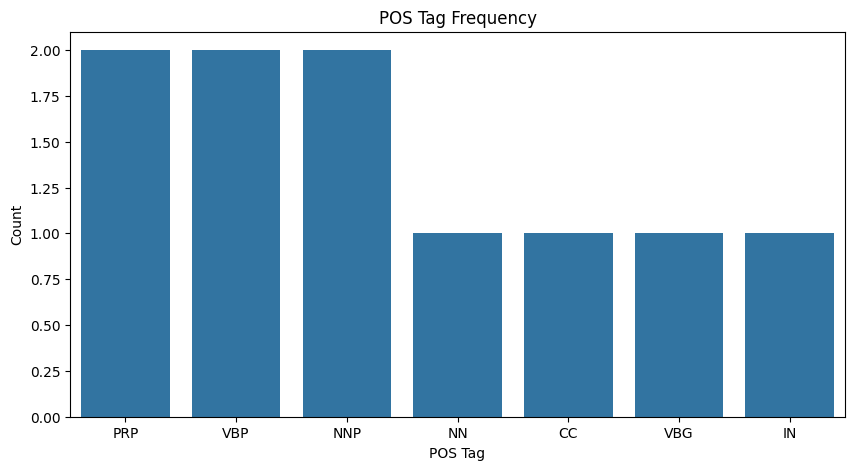

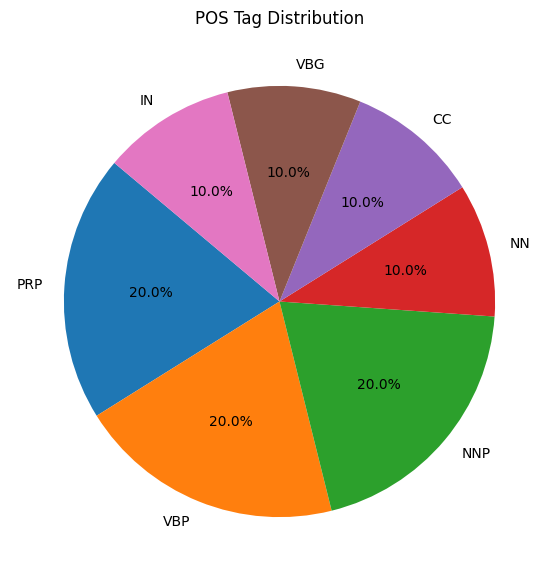

In [12]:
plt.figure(figsize=(10,5))
sns.barplot(x=list(pos_counts.keys()), y=list(pos_counts.values()))
plt.title("POS Tag Frequency")
plt.xlabel("POS Tag")
plt.ylabel("Count")
plt.show()

plt.figure(figsize=(7,7))
plt.pie(pos_counts.values(), labels=pos_counts.keys(), autopct='%1.1f%%', startangle=140)
plt.title("POS Tag Distribution")
plt.show()

In [13]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.pipeline import make_pipeline
from sklearn.metrics import accuracy_score, classification_report

In [15]:
#1.Load dataset (example:dataset.csv with columns 'text' and label)
df= pd.read_csv("/content/combined_sentiment_data.csv")

#Check first rows
print(df.head())

#2. Split into train/test
x_train, x_test, y_train, y_test= train_test_split(
        df['sentence'], df['sentiment'], test_size=0.2, random_state=42)
#3. Build pipeline (TF-IDF+ Naive Bayes)

model= make_pipeline(TfidfVectorizer(), MultinomialNB())

                                            sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive


In [17]:
#4. Train model

model.fit(x_train, y_train)

#5. Predict

y_pred= model.predict(x_test)

#6. Evaluate
print(classification_report(y_test, y_pred))

#7. Try new examples

new_texts = [
      "The team won the championship after a tough season.",
      "Researchers discovered water on Mars."
]
predictions = model.predict(new_texts)
print(predictions)

              precision    recall  f1-score   support

    negative       0.83      0.83      0.83       334
    positive       0.82      0.83      0.83       328

    accuracy                           0.83       662
   macro avg       0.83      0.83      0.83       662
weighted avg       0.83      0.83      0.83       662

['negative' 'negative']


In [18]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report

df= pd.read_csv("/content/combined_sentiment_data.csv")

#Check first rows
print(df.head())

# 2. Split dataset
X_train, X_test, y_train, y_test = train_test_split(
    df['sentence'], df['sentiment'], test_size=0.2, random_state=42
)

# 3. Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(X_train)
X_test_tfidf = tfidf.transform(X_test)

# 4. Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train_tfidf, y_train)

# 5. Predict
y_pred = model.predict(X_test_tfidf)

# 6. Evaluate
print(classification_report(y_test, y_pred))

# 7. Try new sample
new_sample = ["I love this product!"]
prediction = model.predict(tfidf.transform(new_sample))
print("Prediction:", prediction[0])

                                            sentence sentiment
0  So there is no way for me to plug it in here i...  negative
1                        Good case, Excellent value.  positive
2                             Great for the jawbone.  positive
3  Tied to charger for conversations lasting more...  negative
4                                  The mic is great.  positive
              precision    recall  f1-score   support

    negative       0.82      0.81      0.81       334
    positive       0.81      0.82      0.81       328

    accuracy                           0.81       662
   macro avg       0.81      0.81      0.81       662
weighted avg       0.81      0.81      0.81       662

Prediction: positive


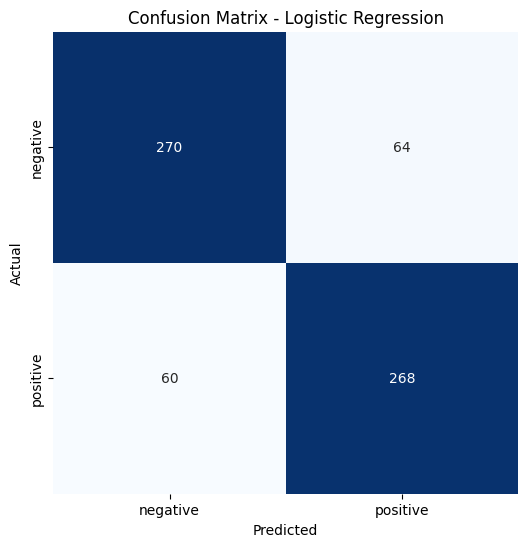

In [23]:
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression # Import LogisticRegression

def plot_results(y_true, y_pred, model_name):
    """
    Plots the confusion matrix for the given true and predicted labels.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model for the plot title.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

# Logistic Regression Model
lr_model = LogisticRegression(max_iter=1000, solver="lbfgs")
lr_model.fit(X_train_tfidf, y_train)
y_pred_lr = lr_model.predict(X_test_tfidf)


# Confusion Matrix Plot
model = lr_model   # logistic regression model has .classes_
plot_results(y_test, y_pred_lr, "Logistic Regression")

In [21]:
from sklearn.metrics import confusion_matrix

def plot_results(y_true, y_pred, model_name):
    """
    Plots the confusion matrix for the given true and predicted labels.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model for the plot title.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

In [22]:
from sklearn.metrics import confusion_matrix

def plot_results(y_true, y_pred, model_name):
    """
    Plots the confusion matrix for the given true and predicted labels.

    Args:
        y_true (array-like): True labels.
        y_pred (array-like): Predicted labels.
        model_name (str): Name of the model for the plot title.
    """
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(6, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False,
                xticklabels=model.classes_, yticklabels=model.classes_)
    plt.title(f'Confusion Matrix - {model_name}')
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.show()

/tmp/ipython-input-858335534.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x=df['sentiment'], palette="Set2")


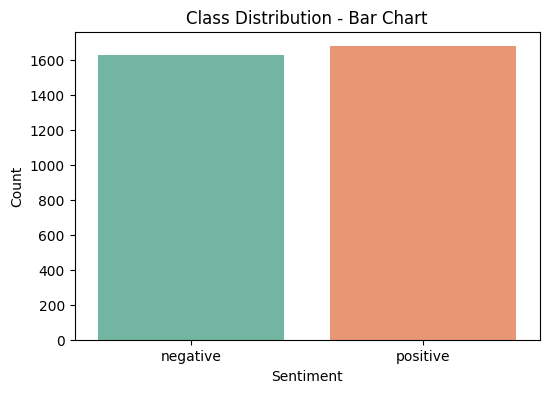

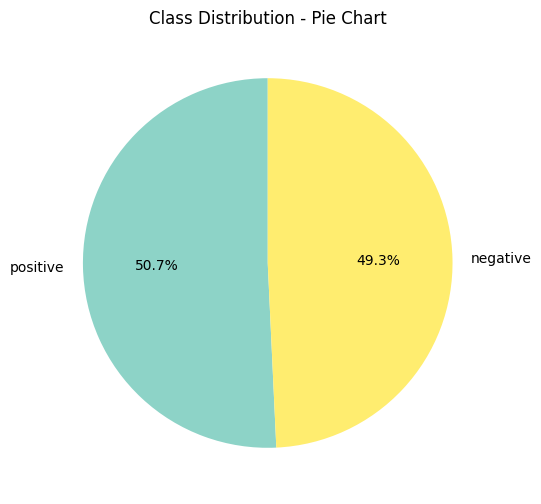

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns

# (A) Bar Chart of Sentiment Distribution
plt.figure(figsize=(6,4))
sns.countplot(x=df['sentiment'], palette="Set2")
plt.title("Class Distribution - Bar Chart")
plt.xlabel("Sentiment")
plt.ylabel("Count")
plt.show()

# (B) Pie Chart of Sentiment Distribution
plt.figure(figsize=(6,6))
df['sentiment'].value_counts().plot.pie(
    autopct='%1.1f%%', startangle=90, cmap="Set3", ylabel=""
)
plt.title("Class Distribution - Pie Chart")
plt.show()

In [25]:
import re
import pandas as pd
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import make_pipeline
from sklearn.metrics import classification_report
import nltk

nltk.download('stopwords')

# Stemmer + Stopwords
stemmer = PorterStemmer()
stop_words = set(stopwords.words("english"))

# Custom Preprocessing Function
def custom_preprocess(text):
    # Lowercase
    text = text.lower()
    # Remove special chars/numbers
    text = re.sub(r"[^a-z\s]", "", text)
    # Tokenize
    tokens = text.split()
    # Remove stopwords + stemming
    tokens = [stemmer.stem(word) for word in tokens if word not in stop_words]
    return " ".join(tokens)

# Load dataset
df = pd.read_csv("/content/combined_sentiment_data.csv")

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    df['sentence'], df['sentiment'], test_size=0.2, random_state=42
)

# Build Pipeline with custom preprocessing + TF-IDF + Logistic Regression
model = make_pipeline(
    TfidfVectorizer(preprocessor=custom_preprocess, max_features=5000, ngram_range=(1,2)),
    LogisticRegression(max_iter=1000, solver="lbfgs")
)

# Train
model.fit(X_train, y_train)

# Predict
y_pred = model.predict(X_test)

# Evaluate
print(classification_report(y_test, y_pred))

# Try new sample
new_sample = ["I love this product!"]
print("Prediction:", model.predict(new_sample)[0])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


              precision    recall  f1-score   support

    negative       0.83      0.80      0.81       334
    positive       0.80      0.83      0.82       328

    accuracy                           0.81       662
   macro avg       0.81      0.81      0.81       662
weighted avg       0.81      0.81      0.81       662

Prediction: positive


   Class Index                                              Title  \
0            3                  Fears for T N pension after talks   
1            4  The Race is On: Second Private Team Sets Launc...   
2            4      Ky. Company Wins Grant to Study Peptides (AP)   
3            4      Prediction Unit Helps Forecast Wildfires (AP)   
4            4        Calif. Aims to Limit Farm-Related Smog (AP)   

                                         Description  
0  Unions representing workers at Turner   Newall...  
1  SPACE.com - TORONTO, Canada -- A second\team o...  
2  AP - A company founded by a chemistry research...  
3  AP - It's barely dawn when Mike Fitzpatrick st...  
4  AP - Southern California's smog-fighting agenc...  


/tmp/ipython-input-3417784179.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Class Index', data=df, palette="Set2")


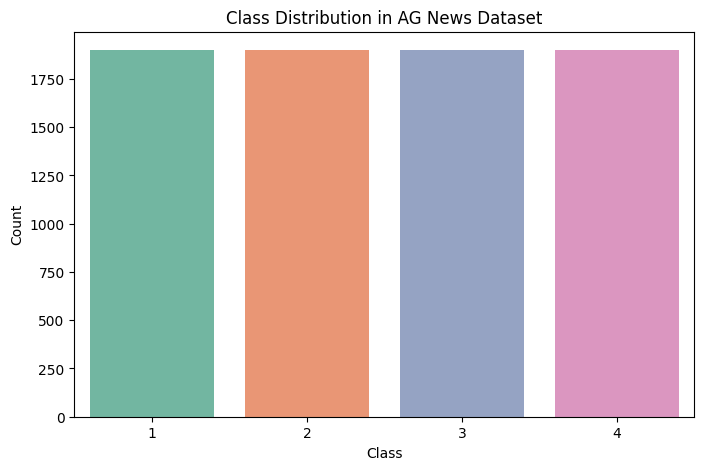

In [31]:
#1.Load dataset (example:dataset.csv with columns 'text' and label)
df= pd.read_csv("/content/sample_data/test.csv")
#Check first rows
print(df.head())

#....... visualization ..............
plt.figure(figsize=(8,5))
sns.countplot(x='Class Index', data=df, palette="Set2")

plt.title("Class Distribution in AG News Dataset")
plt.xlabel("Class")
plt.ylabel("Count")
plt.show()

In [32]:
# 3. Convert text to TF-IDF features
tfidf = TfidfVectorizer(max_features=5000, ngram_range=(1,2))  # unigrams + bigrams
X_train_tfidf = tfidf.fit_transform(x_train)
X_test_tfidf = tfidf.transform(x_test)

# 4. Train Logistic Regression
model = LogisticRegression(max_iter=1000, solver="lbfgs")
model.fit(X_train_tfidf, y_train)

# 5. Predict
y_pred = model.predict(X_test_tfidf)

# 6. Evaluate
print(classification_report(y_test, y_pred))

# 7. Try new sample
new_sample = ["I love this product!"]
prediction = model.predict(tfidf.transform(new_sample))
print("Prediction:", prediction[0])

              precision    recall  f1-score   support

           1       0.86      0.86      0.86       373
           2       0.90      0.92      0.91       389
           3       0.82      0.80      0.81       359
           4       0.81      0.81      0.81       399

    accuracy                           0.85      1520
   macro avg       0.85      0.85      0.85      1520
weighted avg       0.85      0.85      0.85      1520

Prediction: 4
